In [5]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [6]:
#Dataset location - Event log of a loan application process - https://data.4tu.nl/articles/_/1268920
log = xes_importer.apply('loan_application_process_event_log_2012.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

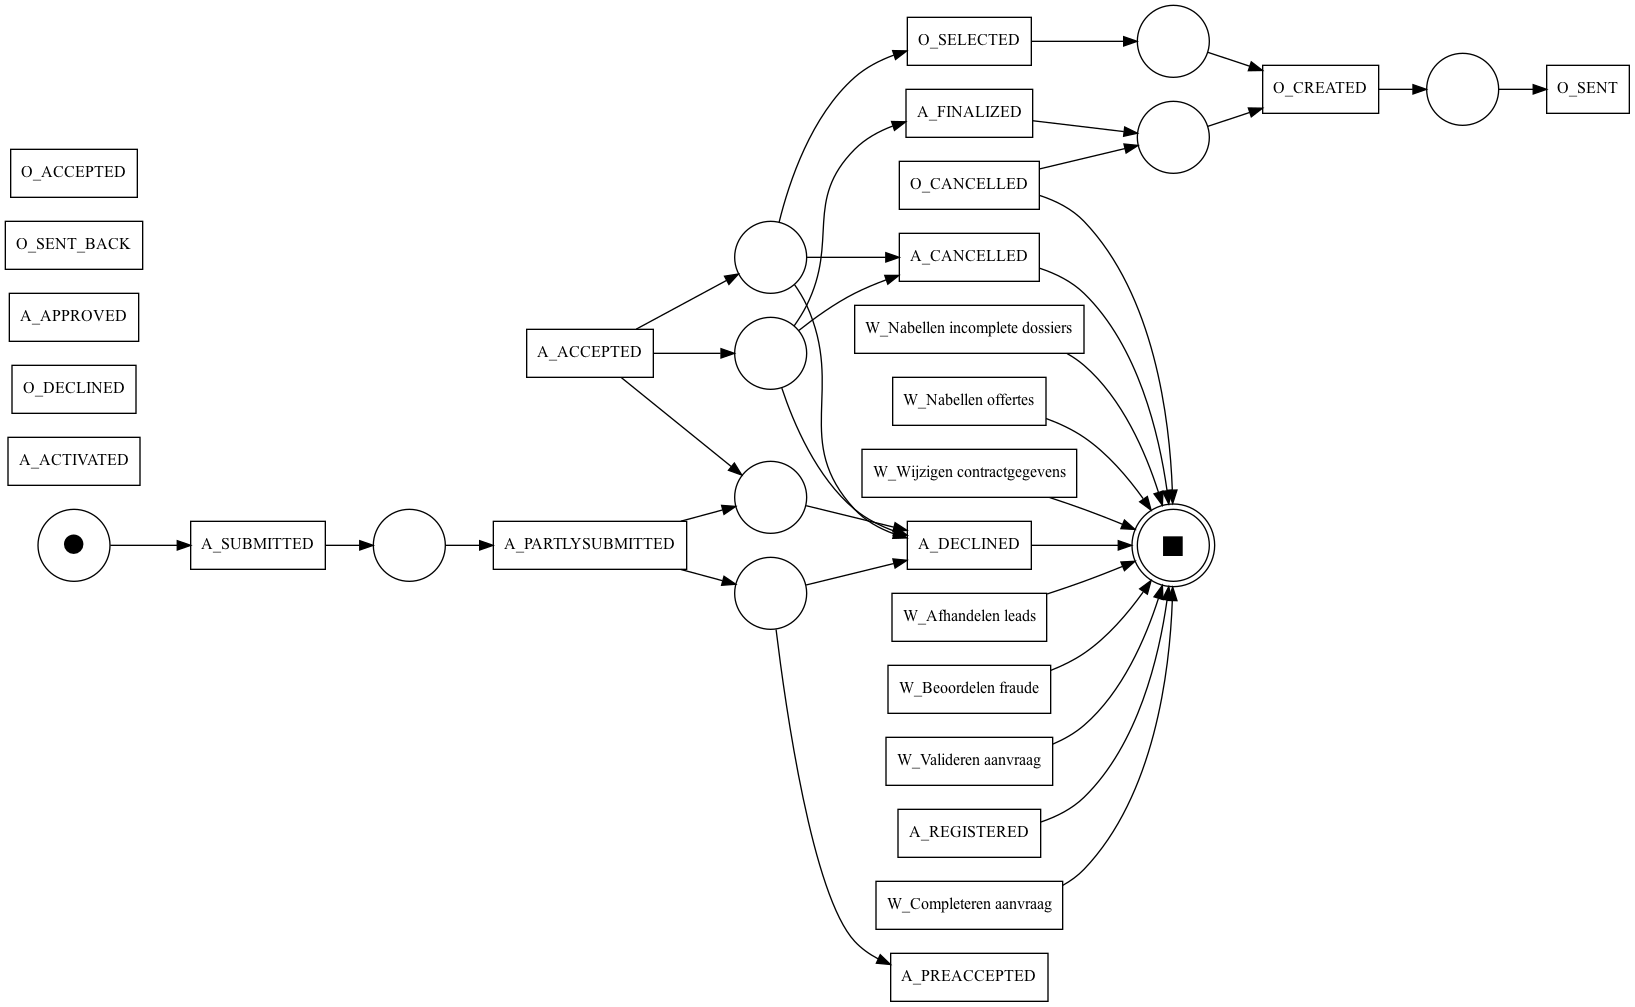

In [7]:
# Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualization
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gVisualization)


replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

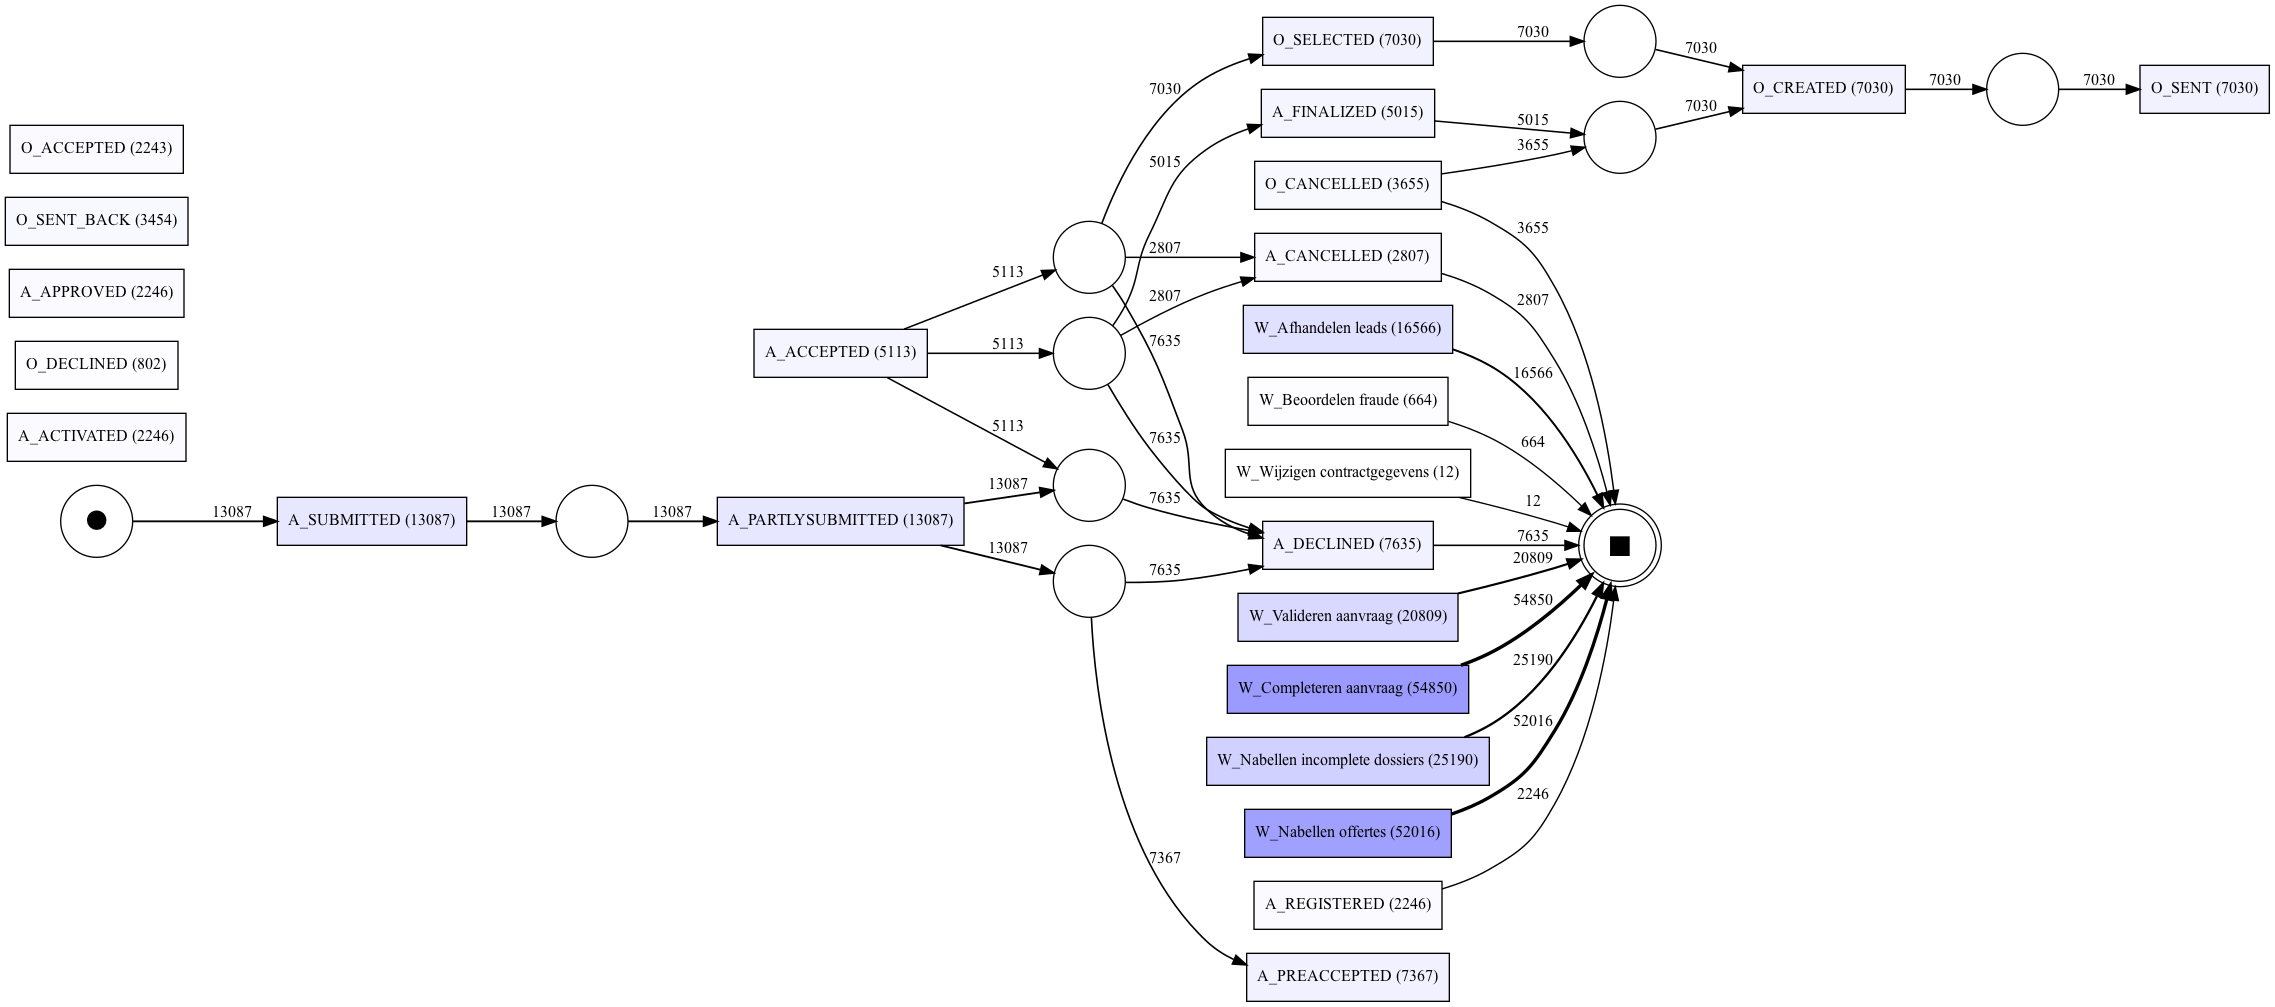

In [8]:
# add information about frequency to the Visualization 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.view(gVisualization)


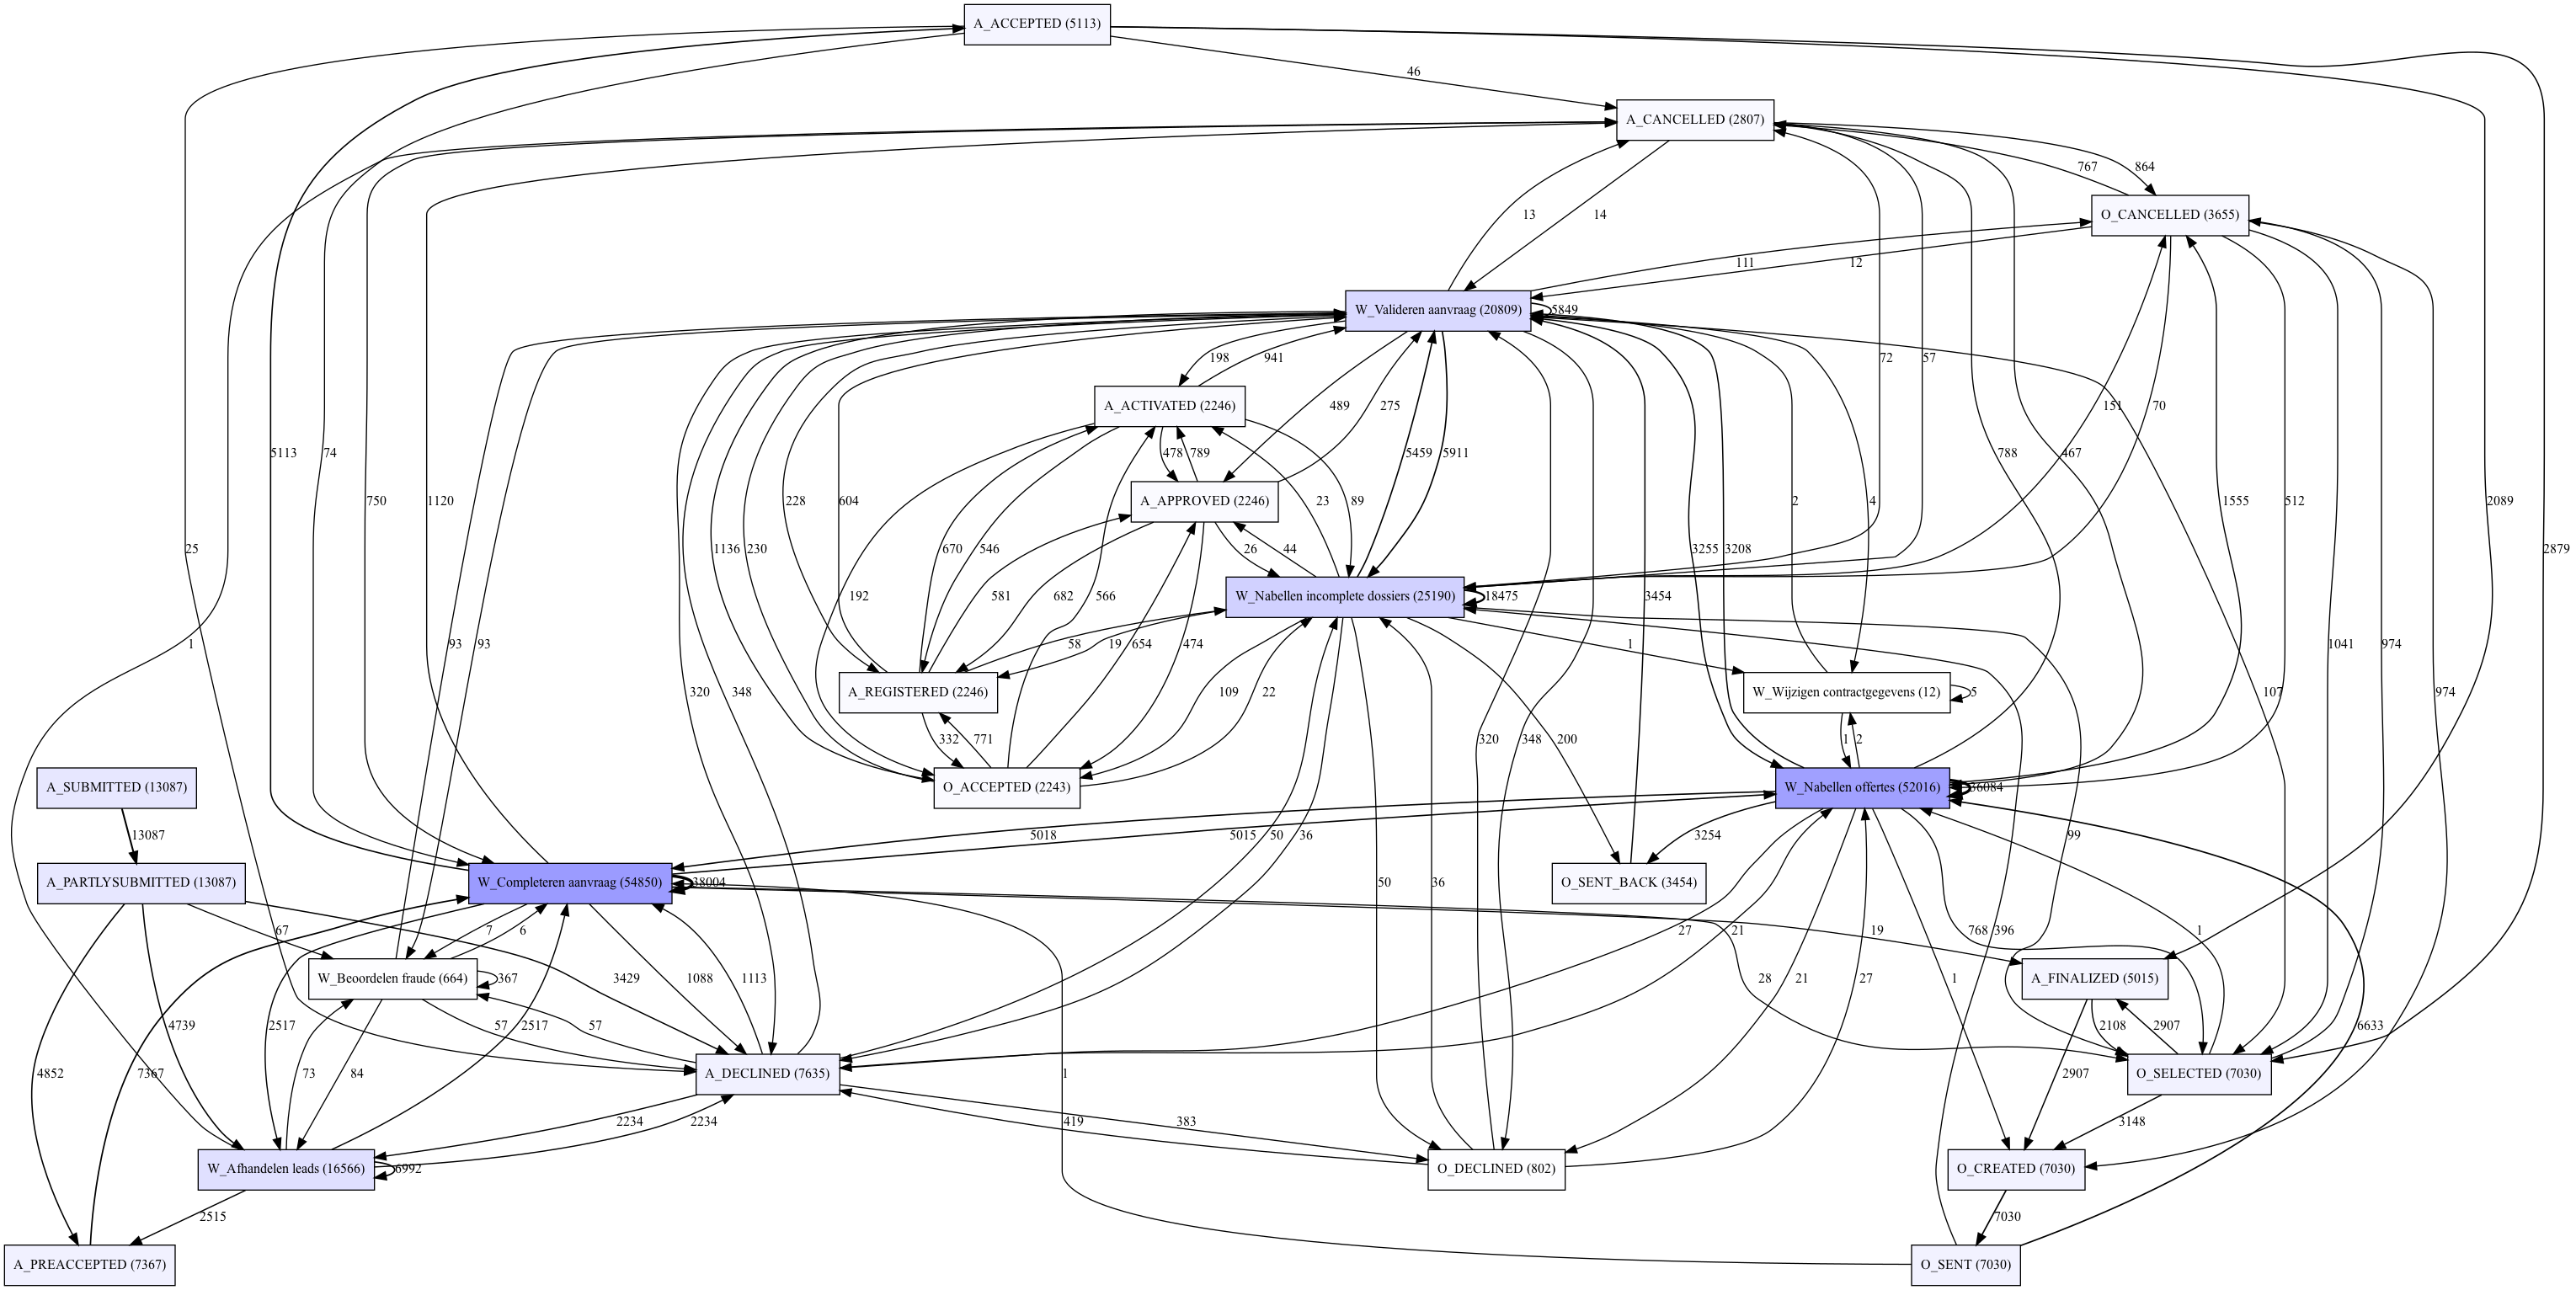

In [9]:
# Directly-Follows Graph
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# Visualization
gVisualization = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gVisualization)

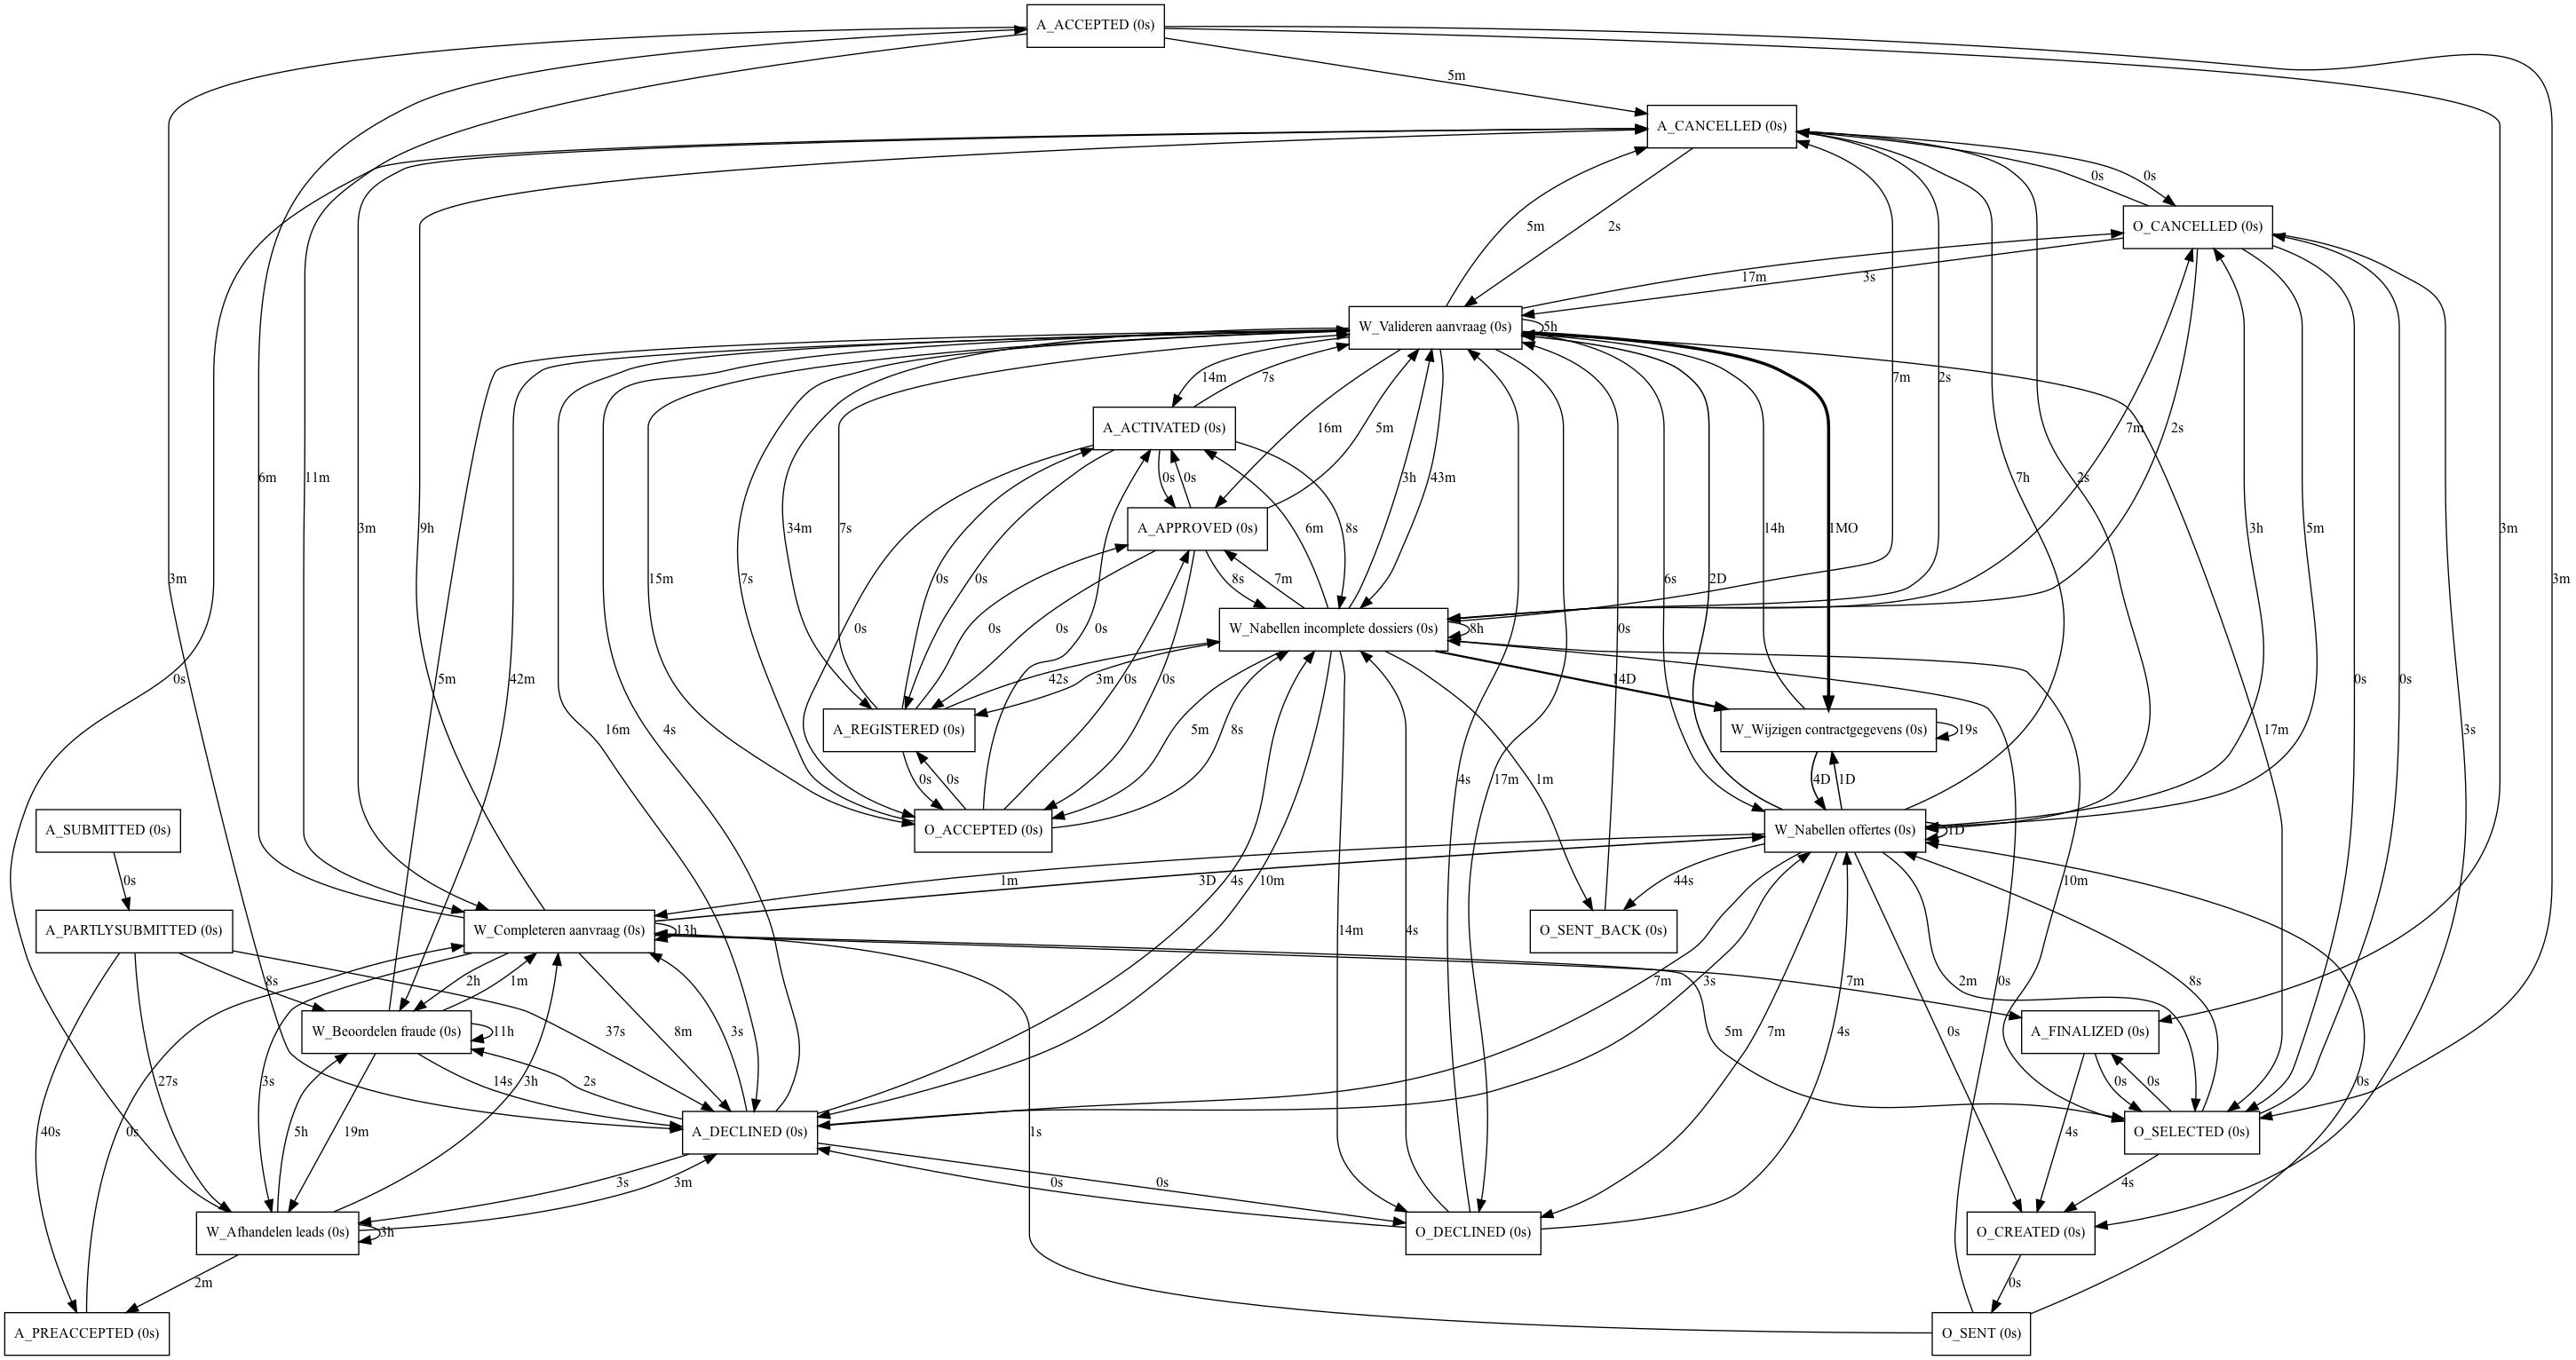

In [10]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# Visualization
gVisualization = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gVisualization)

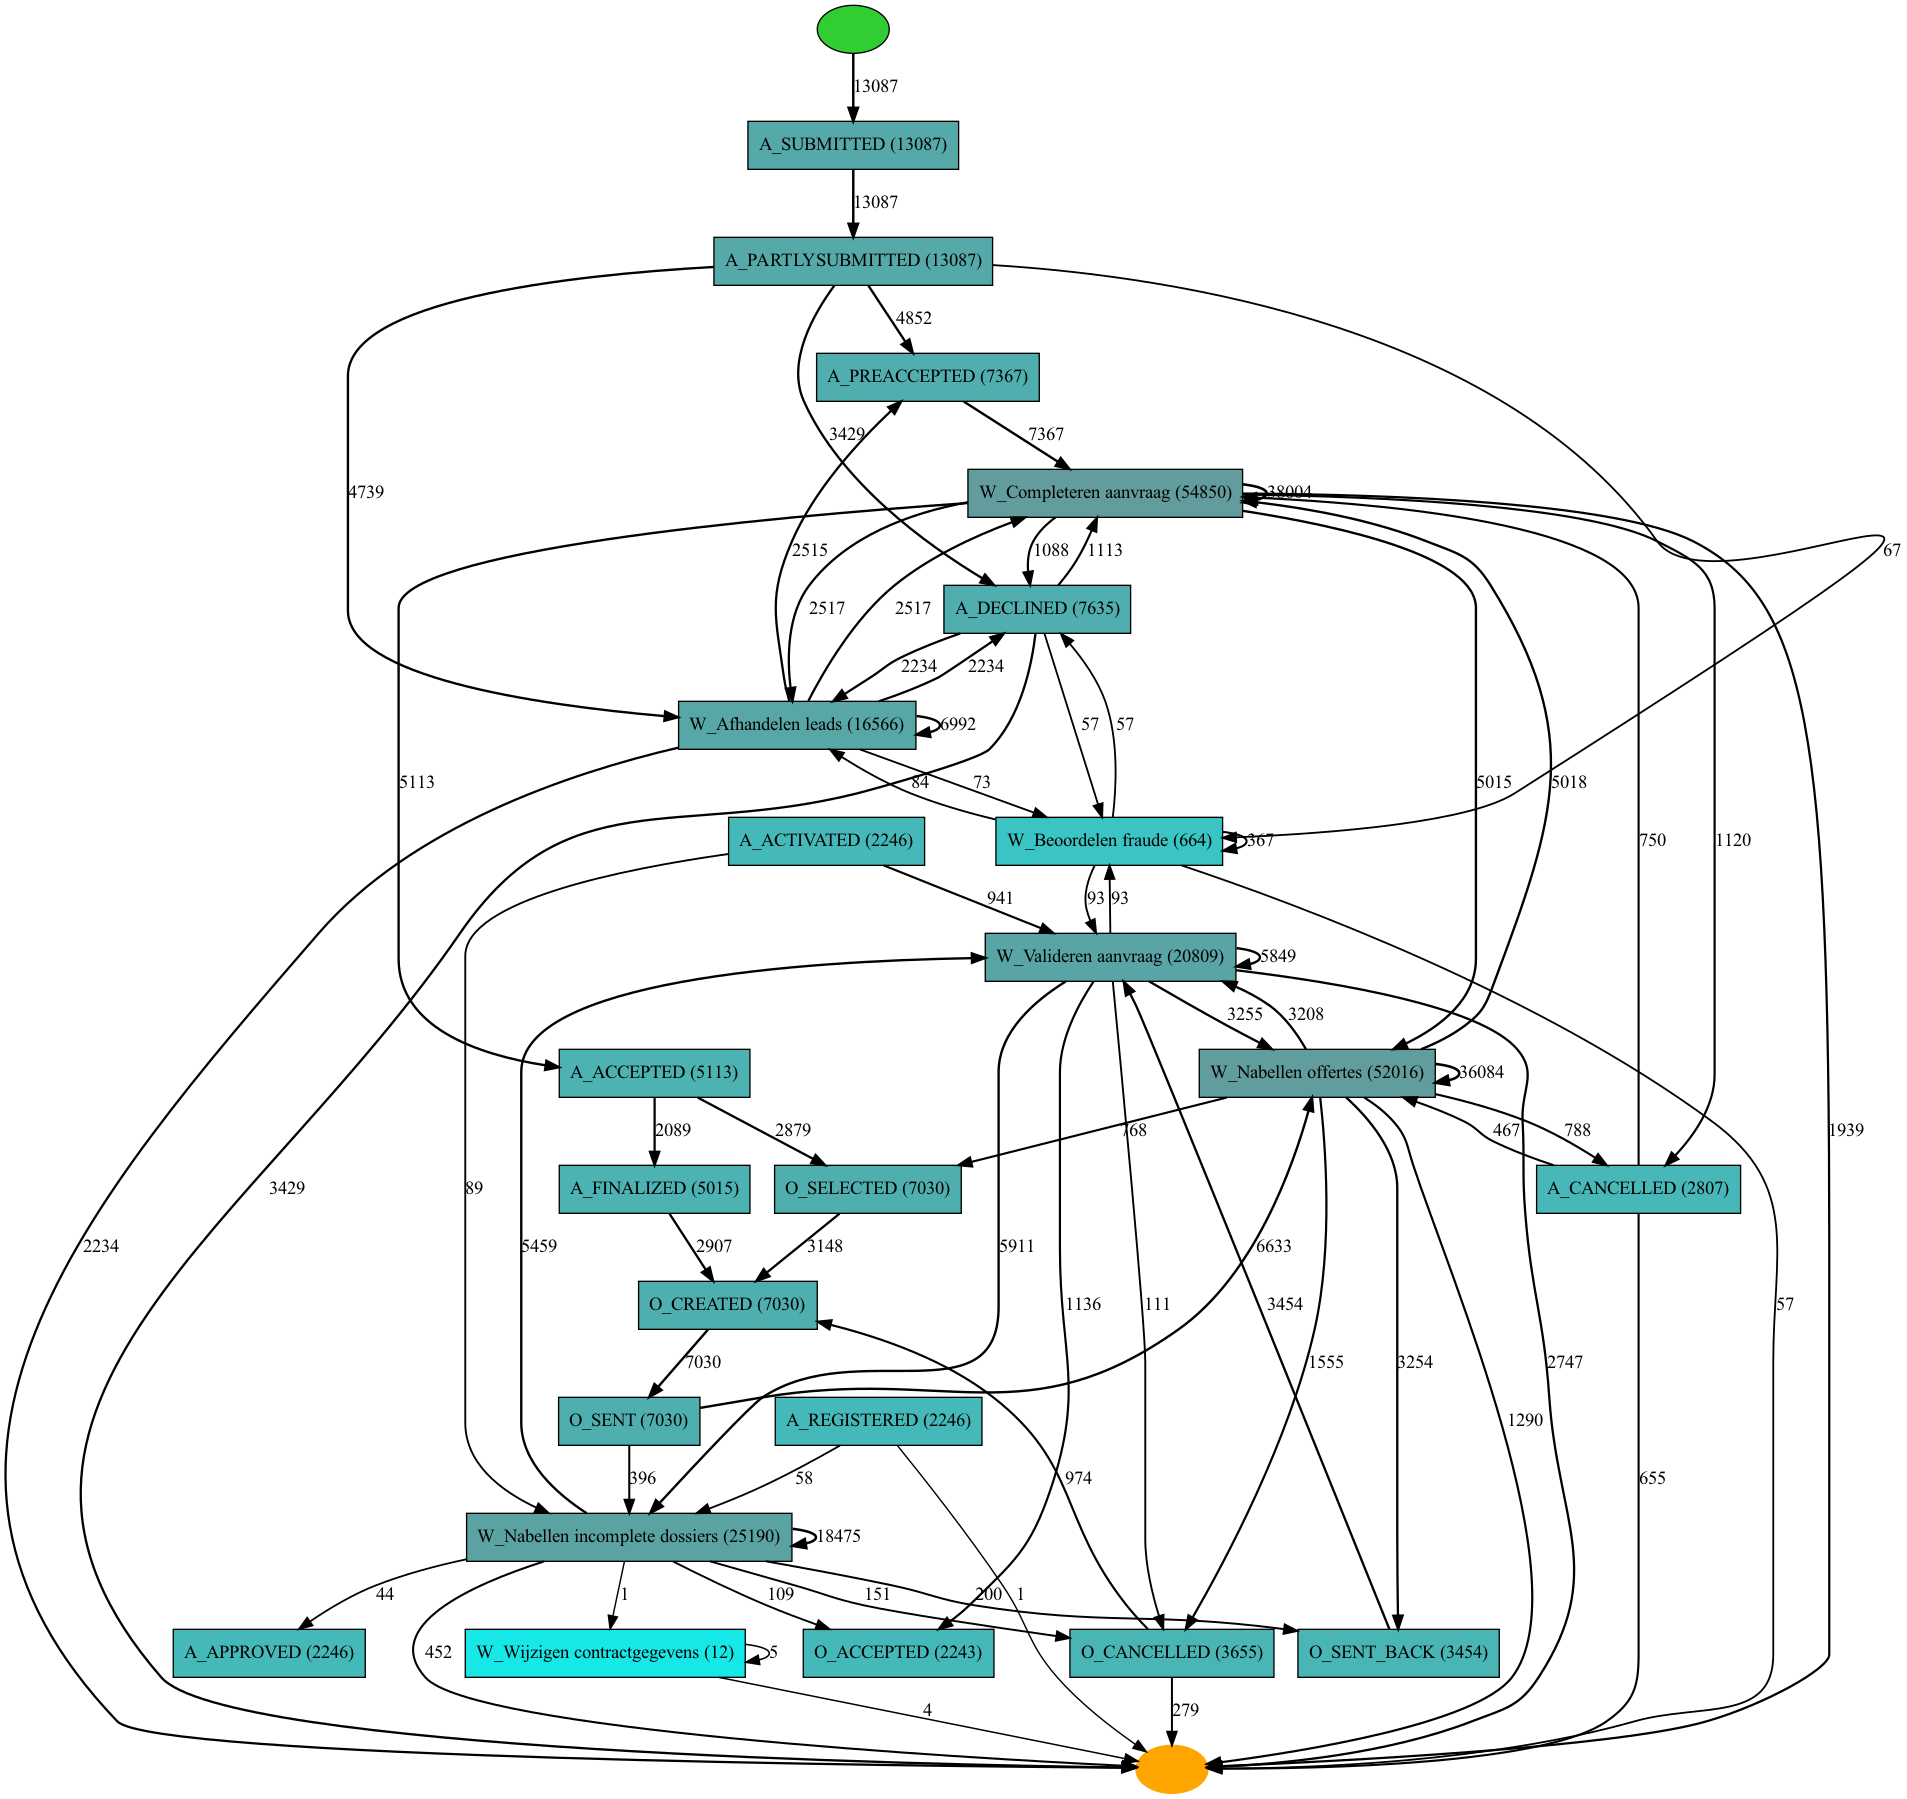

In [11]:
# Heuristic Miner
heu_net = heuristics_miner.apply_heu(log)

# Visualization
gVisualization = hn_visualizer.apply(heu_net)
hn_visualizer.view(gVisualization)

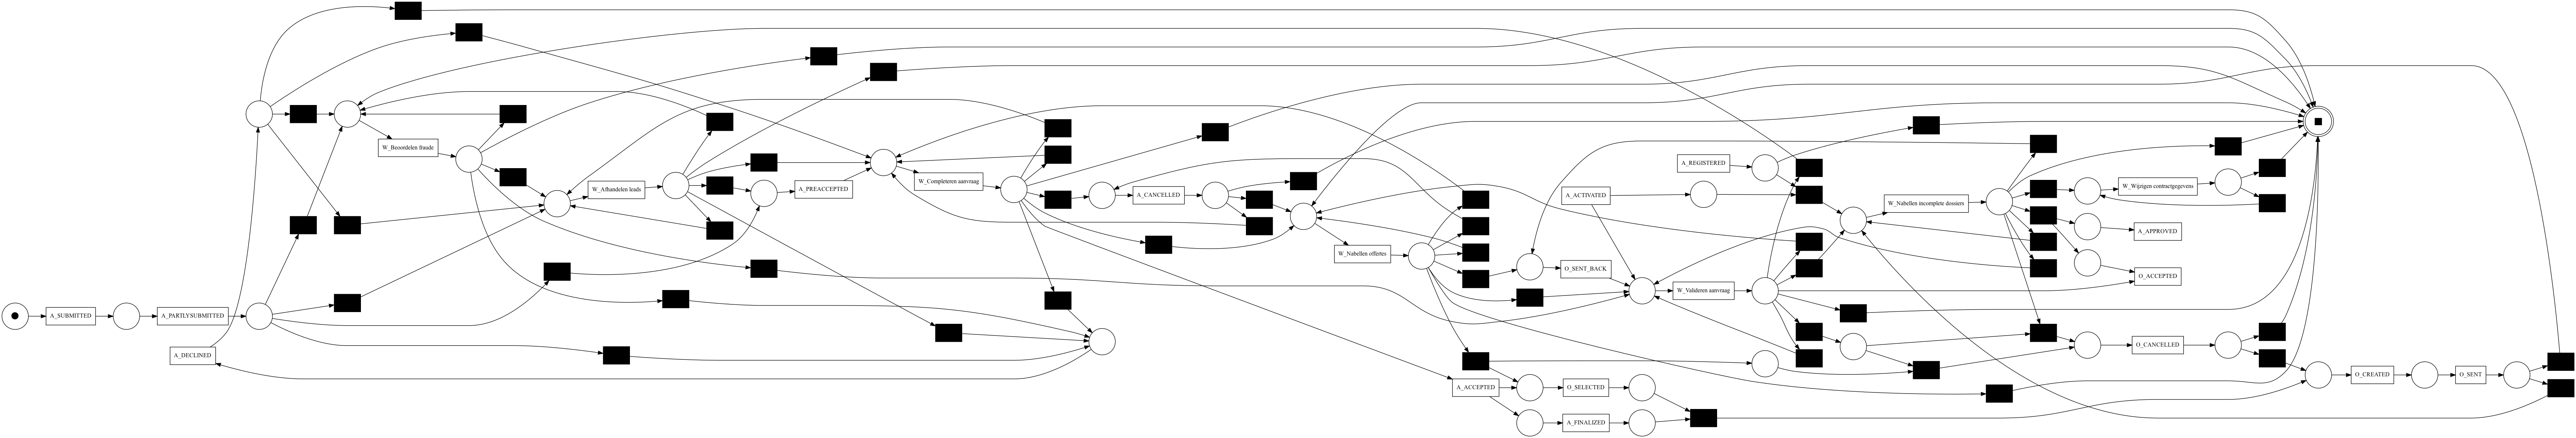

In [12]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# Visualization
gVisualization = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gVisualization)

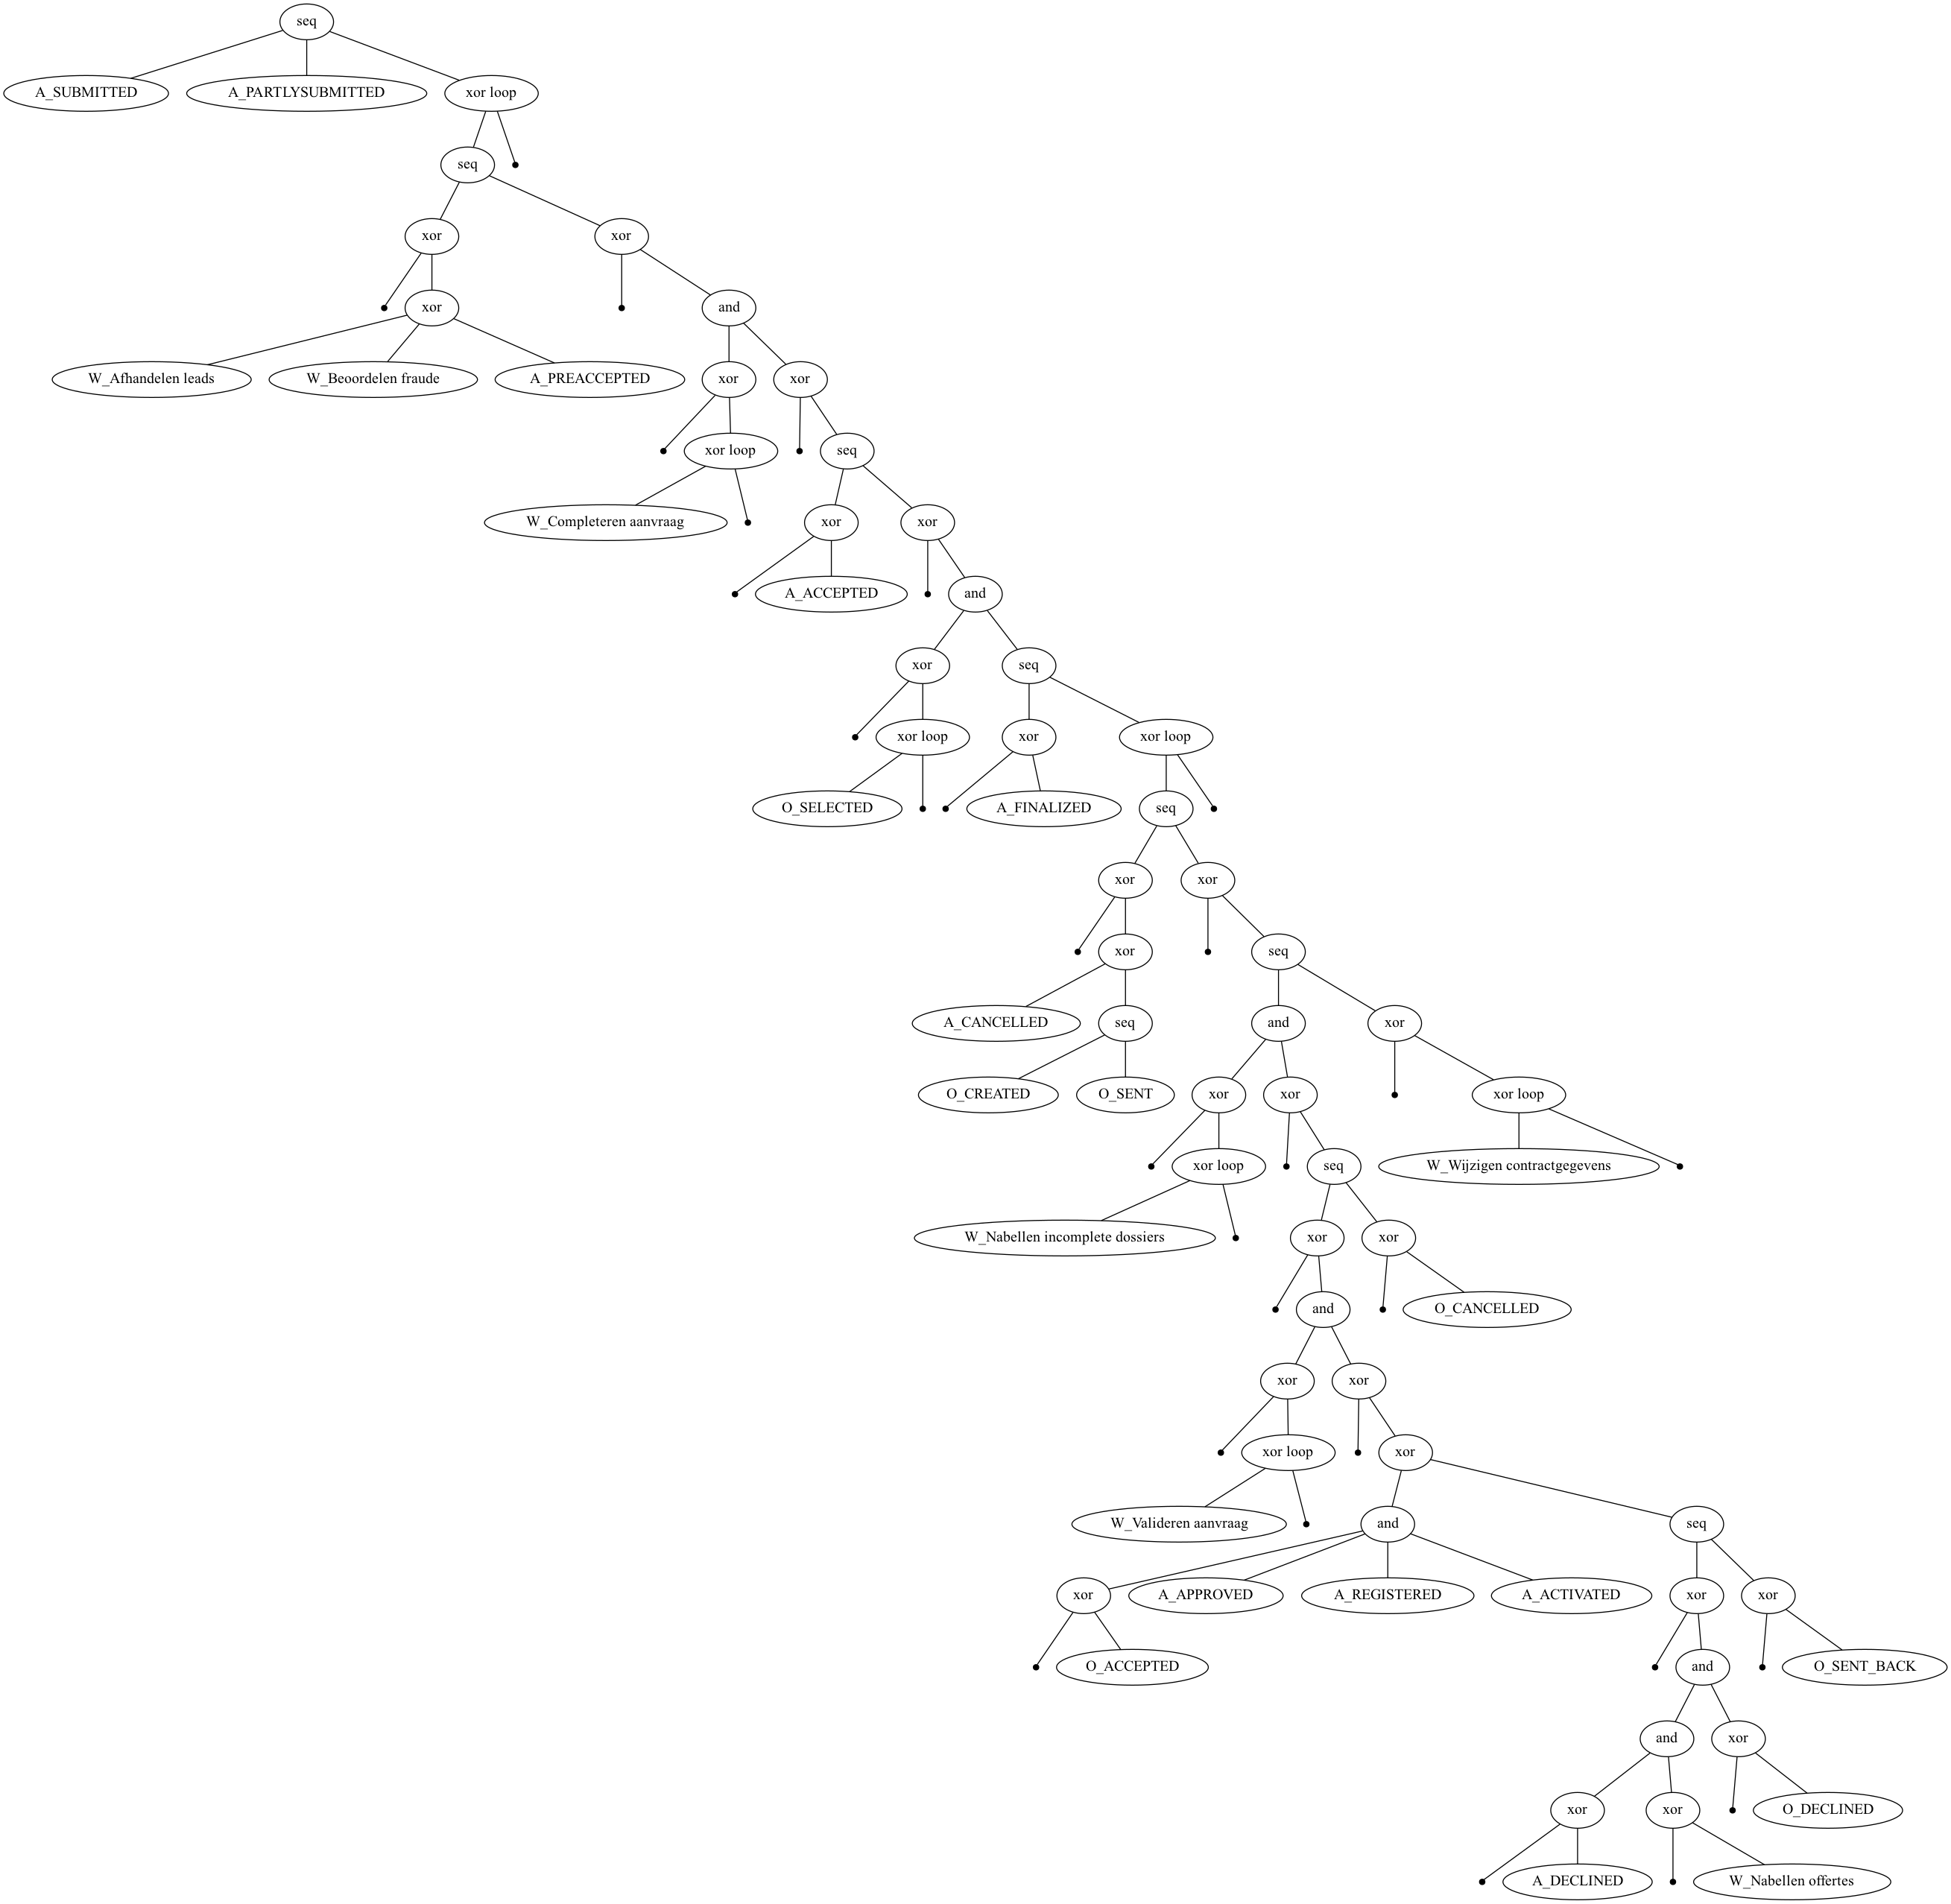

In [13]:
# Inductive Miner
# create the process tree

tree = inductive_miner.apply(log)

# Visualization
gVisualization = pt_visualizer.apply(tree)
pt_visualizer.view(gVisualization)

replaying log with TBR, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

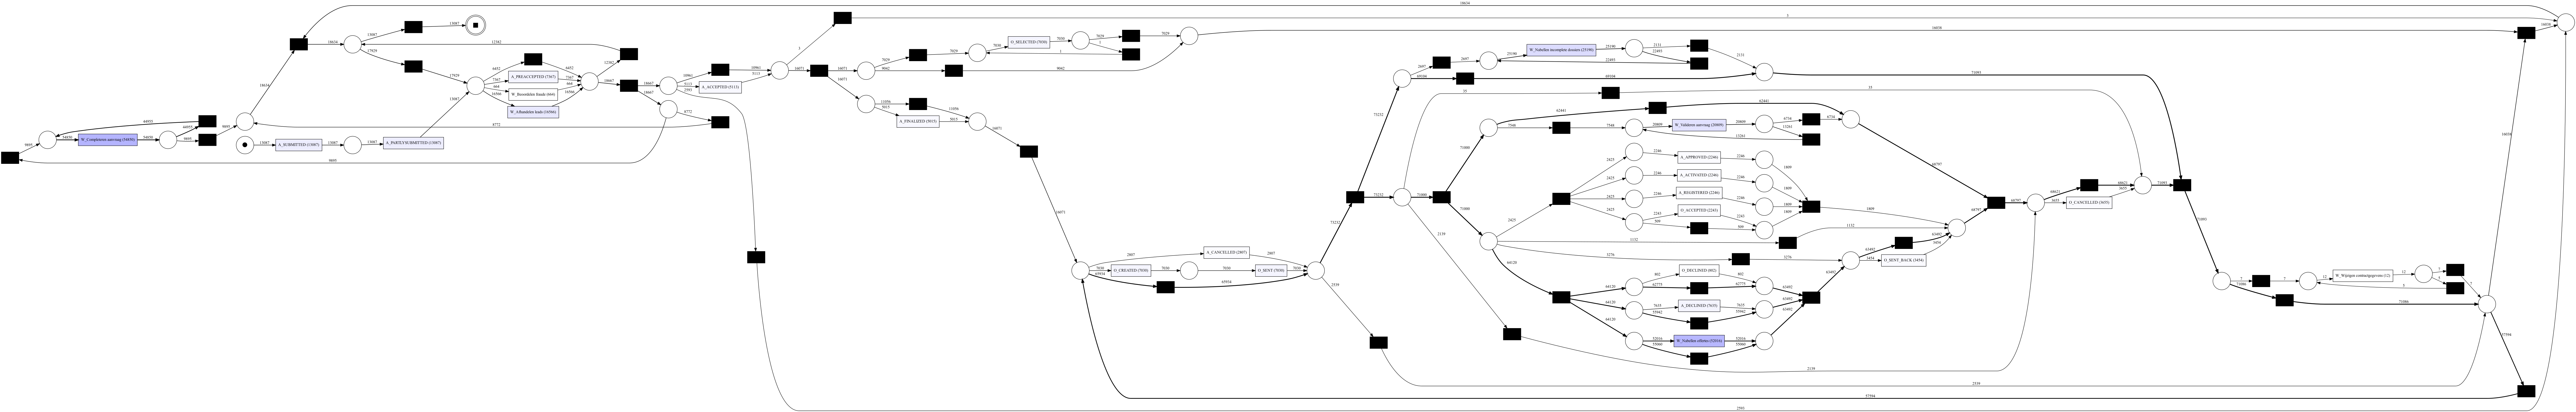

In [14]:
# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# Visualization
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gVisualization = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gVisualization)

In [16]:
# Conformance checking
# Perform token-based replay conformance checking
net, initial_marking, final_marking = alpha_miner.apply(log)

# Print the number of traces that are conformant
conformant_cases = [case for case in final_marking if case not in initial_marking]
print("Number of conformant cases:", len(conformant_cases))

# Print the number of traces that are non-conformant
non_conformant_cases = [case for case in initial_marking if case not in final_marking]
print("Number of non-conformant cases:", len(non_conformant_cases))

Number of conformant cases: 1
Number of non-conformant cases: 1
